# 방범용CCTV 위치와 인구 데이터분석
- https://data.busan.go.kr/
- 파일데이터 "부산광역시_방범용 CCTV 정보_20230622.CSV" 다운로드
- 목표: CCTV 수와 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [2]:
import pandas as pd
file_path = "./ref/부산광역시_방범용CCTV 정보_20230622.csv"
CCTV = pd.read_csv(file_path, encoding="EUC-KR")
CCTV.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
4069,(6차)_원불교남천교당,"10.1.11.41:0:0:0:0:0:0,10.1.11.41:9400:",수영-6차
2714,0314-13-가야대로388번길38_한샘부엌가구_앞_고3,"10.1.10.127:0:0:0:0:0:0,10.1.10.127:9401:",사상-13차
739,0253-9-장전2동_식물원로9번길14_장전허브팰리스,"10.1.11.158:0:0:0:0:0:0,10.1.11.158:9400:",금정-9차


In [3]:
# CCTV.columns = ["x","xx","local"]
cctv = CCTV.rename(columns={"CCTV 그룹":"local"})['local']

In [4]:
cctv = cctv.apply(lambda x: x.split("-")[0])

cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [5]:
cctv.sample(3)

,local,count
8,연제,377
1,사상,422
9,동구,374


In [6]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)

file_path2 = "./ref/연령별인구현황월간202306.xlsx"
ori = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3)
ori.head(2)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15


In [7]:
data = ori[['행정기관','총 인구수']]
data.columns = ["local","population"]
data = data.loc[1:]
data['local'] = data['local'].apply(lambda x: x.replace("부산광역시 ","").strip())
data = data.reset_index(drop=True) # drop = True는 기존 인덱스를 삭제하고 새롭게 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [8]:
# 공백 조심 data["local"] = data["local"].apply(lambda x: len(x))
data["local"] = data["local"].apply(lambda x: x.replace("구","").replace("군","").replace("부산진","진구").strip() if len(x.strip())>2 else x.strip())

In [9]:
total = pd.merge(cctv, data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by="population", ascending=False)
total = total.set_index('local') # 중요함.
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


Text(0.2, 0.4, '한글')

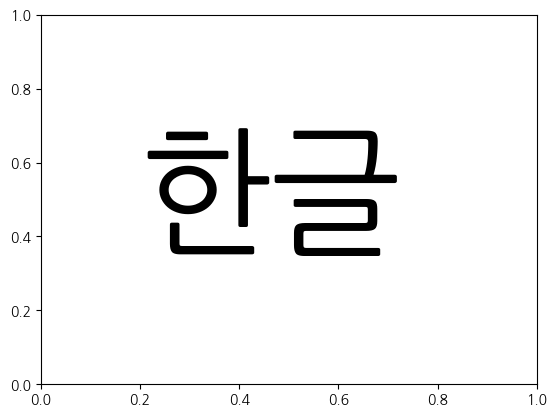

In [10]:
# OS에 사용가능한 , 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

# 리눅스용 폰트 경로 설정
plt.rc('font', family="NanumGothic")
plt.text(0.2,0.4,'한글',size=100)

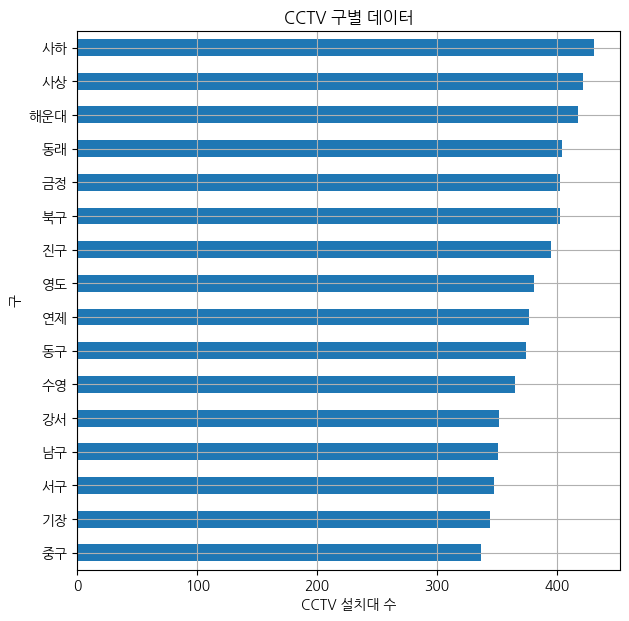

In [11]:
# plt.figure()
total['count'].sort_values().plot( kind="barh",grid=True,figsize=(7,7), ylabel="구")

plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")
plt.show()

[]

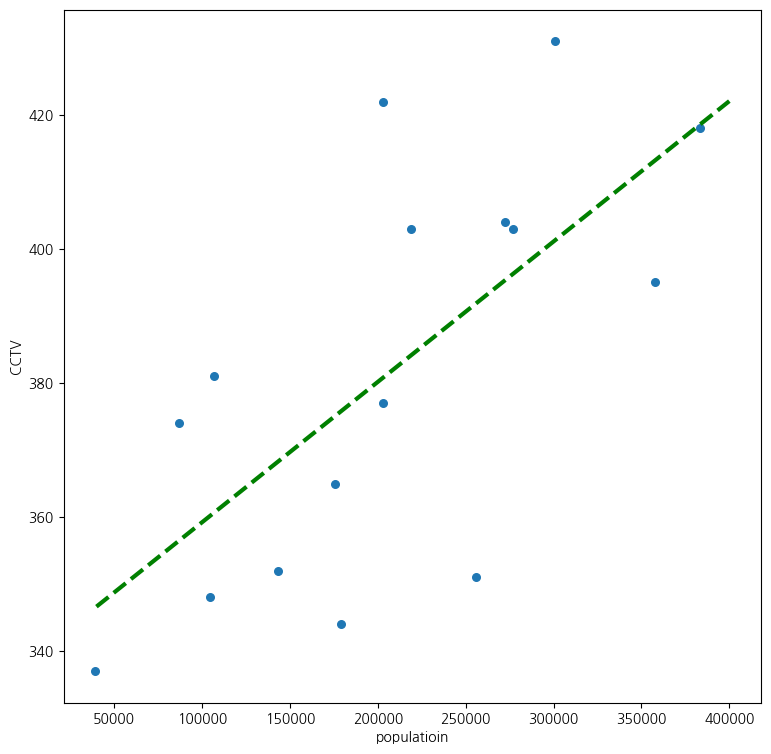

In [12]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')
plt.scatter(total['population'], total['count'], s= 30)
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

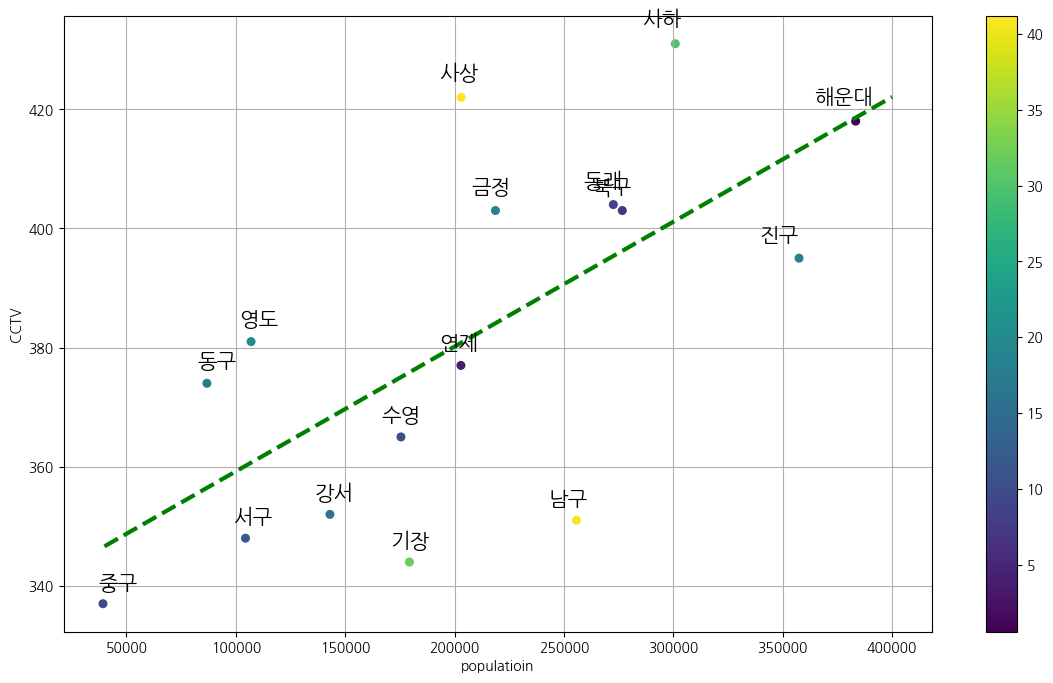

In [15]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1) # x축, y축, 1은 기울기
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total['population'], total['count'], s= 30, c = total['err'])
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()



# 점마다 각 동의 이름을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95, total['count'].iloc[i]*1.007, total.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.show()    

# 인사이트
1. 전반적인 상관관계
- 대체로 인구수가 많을수록 CCTV 수도 많아지는 경향
- 인구 밀집 지역일수록 치안 수요가 높아 자연스러운 결과

2. 특정 지역의 과잉/과소
- 인구 대비 CCTV 설치 비율이 높은 곳 -> 상대적으로 치안 불안 지역, 주요 관광지, 유흥가 밀집 지역일 가능성 ex) 해운대, 사상 등
- 인구 대비 CCTV 설치 비율이 낮은 곳 -> 행정이나 재정적 한계, 도시 개발 속도 차이, 지형적 특성의 가능성  ex) 기장, 중구, 강서

3. 효율적인 CCTV 설치 계획 수립
- 인구수만 기준으로 설치하지 않고, 오차값(잔차)을 반영해 과잉·과소 설치 구간을 파악
- 예측보다 현저히 적은 지역을 우선순위로 두고 CCTV 추가 설치 계획 수립
- 과잉 설치 지역은 유지, 효율성 점검 필요